# ***Q&A Activity on Testing of Hypothesis: Group 8***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# ***1. Carry out descriptive analytics on the dataset.***

In [3]:
data.shape

(28, 3)

In [4]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


Text(0, 0.5, 'Total Marks')

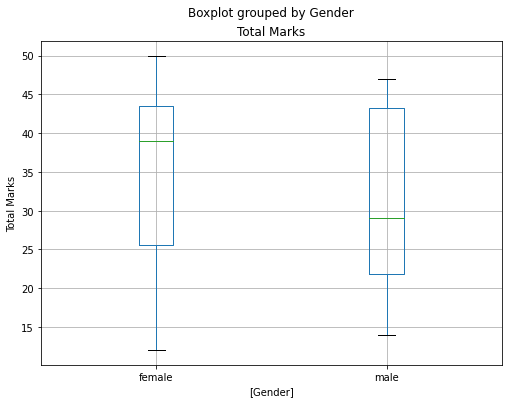

In [5]:
ax=data[['Total Marks','Gender']].boxplot(by='Gender',figsize=(8,6))
ax.set_ylabel('Total Marks')

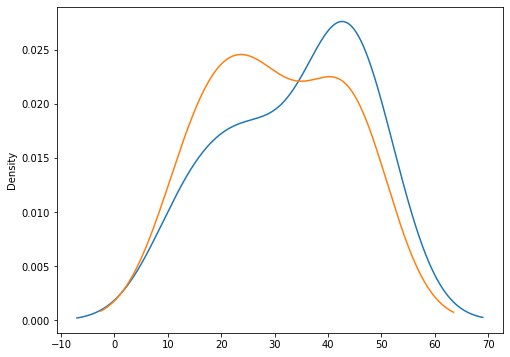

In [6]:
ax1=data.groupby('Gender')['Total Marks'].plot(kind='density',figsize=(8,6))

In [7]:
ax2=data.groupby('Gender').describe()
ax2

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

Text(0, 0.5, 'Total Marks')

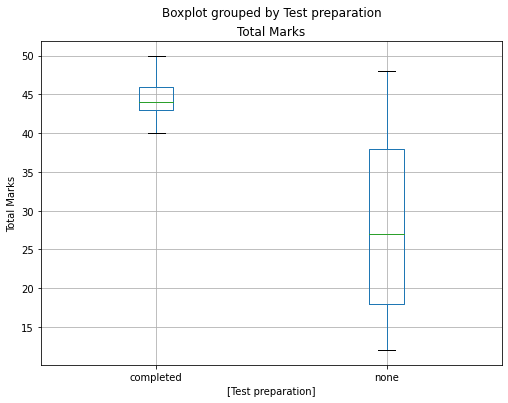

In [8]:
bx=data[['Total Marks','Test preparation']].boxplot(by='Test preparation',figsize=(8,6))
bx.set_ylabel('Total Marks')

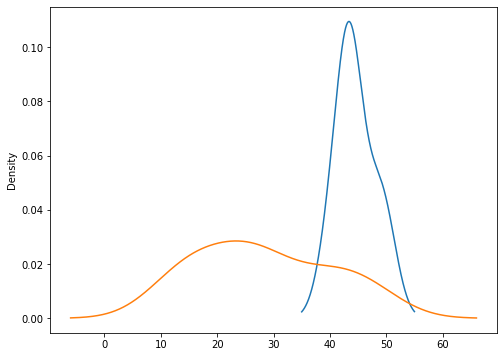

In [9]:
bx1=data.groupby('Test preparation')['Total Marks'].plot(kind='density',figsize=(8,6))

In [10]:
bx2=data.groupby('Test preparation').describe()
bx2

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

The data consist of marks scored by 28 individuals which ranges from 12 to 50 marks and with an average score of 32.32. Standard deviation of the data set is 12.46.
Females have an average marks of 33.75 and males have an average of 30.42.
Based on the test preparation, 7 individuals who completed the test preparation have an average mark of 44.57 and the rest have an average of 28.24.

# ***2. Check whether female and male students scored the same marks.***

In [ ]:
#Hypothesis
#H0: Females and males students scored the same marks
#H1: Females and males students scored different marks
#2 tailed t test

In [11]:
female=data[data['Gender']=='female']
male=data[data['Gender']=='male']
male=male.drop(['Test preparation','Gender'],axis=1)
female=female.drop(['Test preparation','Gender'],axis=1)
tvalue,pvalue=stats.ttest_ind(male,female)
stats.ttest_ind(male,female)

Ttest_indResult(statistic=array([-0.69408853]), pvalue=array([0.49378223]))

In [12]:
tcriteria=(stats.t.ppf((0.05/2),26))
stats.t.ppf((0.05/2),26)

-2.0555294386428713

In [13]:
print('t_value=%3f, p_value=%3f'%(tvalue,pvalue))
if np.abs(tvalue)>np.abs(tcriteria) and pvalue<0.05:
    print('Reject H0: Females and males students scored the same marks. \nThere is a significant difference between the marks socred by males and females')
else:
    print('Accept H0: Females and males students scored the same marks. \nThere is no significant difference between the marks scored by males and females')

t_value=-0.694089, p_value=0.493782
Accept H0: Females and males students scored the same marks. 
There is no significant difference between the marks scored by males and females


# ***3. Whether test preparation helps the students?***

In [ ]:
#Hypothesis
#H0: Test preparation helped the students
#H1: Test preparation doesn't helped the students 
#right tailed t test

In [14]:
test_completed=data[data['Test preparation']=='completed']
test_none=data[data['Test preparation']=='none']
test_completed=test_completed.drop(['Test preparation','Gender'],axis=1)
test_none=test_none.drop(['Test preparation','Gender'],axis=1)
tvalue,pvalue=stats.ttest_ind(test_completed,test_none)
stats.ttest_ind(test_completed,test_none)

Ttest_indResult(statistic=array([3.61436375]), pvalue=array([0.00126713]))

In [15]:
tcriteria=(stats.t.ppf((1-0.05),26))
stats.t.ppf((1-0.05),26)

1.7056179197592727

In [16]:
print('t_value=%3f, p_value=%3f'%(tvalue,pvalue))
if np.abs(tvalue)>np.abs(tcriteria) and pvalue<0.05:
    print('Reject H0: Test preparation helped the students. \nIt is significant that the test preparation has not helped the students to score better.')
else:
    print('Accept H0: Test preparation helped the students. \nIt is significant that the test preparation has helped the students to score better')

t_value=3.614364, p_value=0.001267
Reject H0: Test preparation helped the students. 
It is significant that the test preparation has not helped the students to score better.
